In [1]:
#@title Import relevant modules
import numpy as np
import pandas as pd
import tensorflow as tf
import sklearn.model_selection as sk
from tensorflow.keras import layers
from matplotlib import pyplot as plt

# The following lines adjust the granularity of reporting. 
pd.options.display.max_rows = 10
pd.options.display.float_format = "{:.2f}".format

# The following line improves formatting when ouputting NumPy arrays.
np.set_printoptions(linewidth = 200)

In [2]:
#raw_data = pd.read_csv("alpha_export_residential.csv")
raw_data = pd.read_csv("alpha_export_commercial.csv")
features = raw_data.copy()
labels = features.pop("rfi_count")
#features.pop("building_type")
features.head()

,kw_dwelling,kw_fire,kw_burner,kw_office,kw_commercial,kw_factory,kw_alteration,kw_pool,kw_garage,kw_addition,...,kw_retail,complexity,application_type,spdocs,sddocs,pldocs,NumberLevels,ClassifiedUse,BuildingUse,RestrictedWork
0,1,1,0,1,1,0,0,1,0,0,...,0,0,4,0,0,1,0,11,0,0
1,1,1,0,1,1,0,0,1,0,0,...,0,0,2,0,0,3,0,11,0,0
2,1,1,0,1,1,0,0,1,0,0,...,0,0,3,2,0,1,0,11,0,0
3,1,1,0,1,1,0,0,1,0,0,...,0,0,2,1,0,1,0,14,7,0
4,1,1,0,1,1,0,0,1,0,0,...,0,0,2,1,0,1,0,14,7,0


In [3]:
# split the dataset into training and test sets
x_train, x_test, y_train, y_test = sk.train_test_split(features, labels, test_size=0.2, random_state = 42)

In [4]:
#@title Define the plotting function
def plot_curve(epochs, hist, list_of_metrics):
  """Plot a curve of one or more classification metrics vs. epoch."""  
  # list_of_metrics should be one of the names shown in:
  # https://www.tensorflow.org/tutorials/structured_data/imbalanced_data#define_the_model_and_metrics  

  plt.figure()
  plt.xlabel("Epoch")
  plt.ylabel("Value")

  for m in list_of_metrics:
    x = hist[m]
    plt.plot(epochs[1:], x[1:], label=m)

  plt.legend()

print("Loaded the plot_curve function.")

Loaded the plot_curve function.


In [5]:
def create_model(my_learning_rate):
  """Create and compile a deep neural net."""
  
  # Use a sequential model.
  model = tf.keras.models.Sequential()

  # Define the first hidden layer.   
  model.add(tf.keras.layers.Dense(units=28, activation='relu'))
  
  model.add(tf.keras.layers.Dense(units=28, activation='relu'))
  
  model.add(tf.keras.layers.Dense(units=14, activation='relu'))
  
  # Define a dropout regularization layer. 
  model.add(tf.keras.layers.Dropout(rate=0.2))

  # Define the output layer. The units parameter is set to 3 because
  # the model must choose among 3 possible output values (representing
  # R1, R2, R3 inclusive).
  #
  # Don't change this layer.
  model.add(tf.keras.layers.Dense(units=11, activation='softmax'))
                           
  # Construct the layers into a model that TensorFlow can execute.  
  # Notice that the loss function for multi-class classification
  # is different than the loss function for binary classification.  
  model.compile(optimizer=tf.keras.optimizers.Adam(lr=my_learning_rate),
                loss="sparse_categorical_crossentropy",
                metrics=['accuracy'])
  
  return model    


def train_model(model, train_features, train_label, epochs,
                batch_size=None, validation_split=0.1):
  """Train the model by feeding it data."""

  history = model.fit(x=train_features, y=train_label, batch_size=batch_size,
                      epochs=epochs, shuffle=True, 
                      validation_split=validation_split)
 
  # To track the progression of training, gather a snapshot
  # of the model's metrics at each epoch. 
  epochs = history.epoch
  hist = pd.DataFrame(history.history)

  return epochs, hist

Epoch 1/500
3/3 [==============================] - 0s 45ms/step - loss: 2.6961 - accuracy: 0.1093 - val_loss: 2.3673 - val_accuracy: 0.1059
Epoch 2/500
3/3 [==============================] - 0s 11ms/step - loss: 2.3981 - accuracy: 0.1761 - val_loss: 2.2750 - val_accuracy: 0.3139
Epoch 3/500
3/3 [==============================] - 0s 12ms/step - loss: 2.2942 - accuracy: 0.2995 - val_loss: 2.2228 - val_accuracy: 0.3568
Epoch 4/500
3/3 [==============================] - 0s 13ms/step - loss: 2.2489 - accuracy: 0.3466 - val_loss: 2.2070 - val_accuracy: 0.3923
Epoch 5/500
3/3 [==============================] - 0s 11ms/step - loss: 2.2258 - accuracy: 0.3711 - val_loss: 2.1875 - val_accuracy: 0.4229
Epoch 6/500
3/3 [==============================] - 0s 11ms/step - loss: 2.2026 - accuracy: 0.3970 - val_loss: 2.1505 - val_accuracy: 0.4265
Epoch 7/500
3/3 [==============================] - 0s 11ms/step - loss: 2.1776 - accuracy: 0.3947 - val_loss: 2.1230 - val_accuracy: 0.4322
Epoch 8/500
3/3 [===

3/3 [==============================] - 0s 8ms/step - loss: 1.6897 - accuracy: 0.4904 - val_loss: 1.6536 - val_accuracy: 0.5027
Epoch 60/500
3/3 [==============================] - 0s 8ms/step - loss: 1.6869 - accuracy: 0.4908 - val_loss: 1.6521 - val_accuracy: 0.5045
Epoch 61/500
3/3 [==============================] - 0s 8ms/step - loss: 1.6820 - accuracy: 0.4923 - val_loss: 1.6526 - val_accuracy: 0.5030
Epoch 62/500
3/3 [==============================] - 0s 8ms/step - loss: 1.6848 - accuracy: 0.4932 - val_loss: 1.6507 - val_accuracy: 0.5045
Epoch 63/500
3/3 [==============================] - 0s 8ms/step - loss: 1.6822 - accuracy: 0.4898 - val_loss: 1.6491 - val_accuracy: 0.5048
Epoch 64/500
3/3 [==============================] - 0s 8ms/step - loss: 1.6792 - accuracy: 0.4890 - val_loss: 1.6495 - val_accuracy: 0.5033
Epoch 65/500
3/3 [==============================] - 0s 8ms/step - loss: 1.6723 - accuracy: 0.4916 - val_loss: 1.6477 - val_accuracy: 0.5042
Epoch 66/500
3/3 [===============

3/3 [==============================] - 0s 8ms/step - loss: 1.6402 - accuracy: 0.4969 - val_loss: 1.6336 - val_accuracy: 0.5039
Epoch 118/500
3/3 [==============================] - 0s 8ms/step - loss: 1.6376 - accuracy: 0.4978 - val_loss: 1.6292 - val_accuracy: 0.5036
Epoch 119/500
3/3 [==============================] - 0s 8ms/step - loss: 1.6379 - accuracy: 0.4988 - val_loss: 1.6323 - val_accuracy: 0.5036
Epoch 120/500
3/3 [==============================] - 0s 8ms/step - loss: 1.6356 - accuracy: 0.4981 - val_loss: 1.6291 - val_accuracy: 0.5033
Epoch 121/500
3/3 [==============================] - 0s 8ms/step - loss: 1.6349 - accuracy: 0.4984 - val_loss: 1.6326 - val_accuracy: 0.5042
Epoch 122/500
3/3 [==============================] - 0s 9ms/step - loss: 1.6384 - accuracy: 0.4975 - val_loss: 1.6311 - val_accuracy: 0.5042
Epoch 123/500
3/3 [==============================] - 0s 8ms/step - loss: 1.6368 - accuracy: 0.4973 - val_loss: 1.6305 - val_accuracy: 0.5042
Epoch 124/500
3/3 [========

3/3 [==============================] - 0s 9ms/step - loss: 1.6201 - accuracy: 0.4977 - val_loss: 1.6224 - val_accuracy: 0.5042
Epoch 175/500
3/3 [==============================] - 0s 8ms/step - loss: 1.6183 - accuracy: 0.4982 - val_loss: 1.6213 - val_accuracy: 0.5042
Epoch 176/500
3/3 [==============================] - 0s 8ms/step - loss: 1.6155 - accuracy: 0.4997 - val_loss: 1.6282 - val_accuracy: 0.5033
Epoch 177/500
3/3 [==============================] - 0s 9ms/step - loss: 1.6180 - accuracy: 0.4985 - val_loss: 1.6231 - val_accuracy: 0.5045
Epoch 178/500
3/3 [==============================] - 0s 9ms/step - loss: 1.6221 - accuracy: 0.4982 - val_loss: 1.6295 - val_accuracy: 0.5036
Epoch 179/500
3/3 [==============================] - 0s 8ms/step - loss: 1.6188 - accuracy: 0.4991 - val_loss: 1.6215 - val_accuracy: 0.5045
Epoch 180/500
3/3 [==============================] - 0s 9ms/step - loss: 1.6212 - accuracy: 0.4979 - val_loss: 1.6255 - val_accuracy: 0.5045
Epoch 181/500
3/3 [========

Epoch 232/500
3/3 [==============================] - 0s 8ms/step - loss: 1.6053 - accuracy: 0.4994 - val_loss: 1.6153 - val_accuracy: 0.5036
Epoch 233/500
3/3 [==============================] - 0s 8ms/step - loss: 1.6010 - accuracy: 0.4997 - val_loss: 1.6143 - val_accuracy: 0.5033
Epoch 234/500
3/3 [==============================] - 0s 8ms/step - loss: 1.6034 - accuracy: 0.4996 - val_loss: 1.6128 - val_accuracy: 0.5042
Epoch 235/500
3/3 [==============================] - 0s 8ms/step - loss: 1.6020 - accuracy: 0.5000 - val_loss: 1.6155 - val_accuracy: 0.5027
Epoch 236/500
3/3 [==============================] - 0s 9ms/step - loss: 1.6012 - accuracy: 0.4992 - val_loss: 1.6112 - val_accuracy: 0.5042
Epoch 237/500
3/3 [==============================] - 0s 8ms/step - loss: 1.5990 - accuracy: 0.5001 - val_loss: 1.6165 - val_accuracy: 0.5030
Epoch 238/500
3/3 [==============================] - 0s 8ms/step - loss: 1.6004 - accuracy: 0.4987 - val_loss: 1.6138 - val_accuracy: 0.5042
Epoch 239/500

3/3 [==============================] - 0s 12ms/step - loss: 1.5876 - accuracy: 0.5000 - val_loss: 1.6083 - val_accuracy: 0.5039
Epoch 290/500
3/3 [==============================] - 0s 12ms/step - loss: 1.5912 - accuracy: 0.5000 - val_loss: 1.6103 - val_accuracy: 0.5030
Epoch 291/500
3/3 [==============================] - 0s 11ms/step - loss: 1.5910 - accuracy: 0.4988 - val_loss: 1.6118 - val_accuracy: 0.5027
Epoch 292/500
3/3 [==============================] - 0s 13ms/step - loss: 1.5892 - accuracy: 0.5012 - val_loss: 1.6102 - val_accuracy: 0.5033
Epoch 293/500
3/3 [==============================] - 0s 12ms/step - loss: 1.5897 - accuracy: 0.5001 - val_loss: 1.6095 - val_accuracy: 0.5036
Epoch 294/500
3/3 [==============================] - 0s 12ms/step - loss: 1.5887 - accuracy: 0.4997 - val_loss: 1.6088 - val_accuracy: 0.5036
Epoch 295/500
3/3 [==============================] - 0s 12ms/step - loss: 1.5920 - accuracy: 0.4995 - val_loss: 1.6080 - val_accuracy: 0.5024
Epoch 296/500
3/3 [=

Epoch 347/500
3/3 [==============================] - 0s 13ms/step - loss: 1.5803 - accuracy: 0.5009 - val_loss: 1.6139 - val_accuracy: 0.5024
Epoch 348/500
3/3 [==============================] - 0s 14ms/step - loss: 1.5805 - accuracy: 0.4994 - val_loss: 1.6117 - val_accuracy: 0.5021
Epoch 349/500
3/3 [==============================] - 0s 15ms/step - loss: 1.5783 - accuracy: 0.5010 - val_loss: 1.6110 - val_accuracy: 0.5036
Epoch 350/500
3/3 [==============================] - 0s 12ms/step - loss: 1.5803 - accuracy: 0.5012 - val_loss: 1.6109 - val_accuracy: 0.5030
Epoch 351/500
3/3 [==============================] - 0s 14ms/step - loss: 1.5792 - accuracy: 0.4997 - val_loss: 1.6123 - val_accuracy: 0.5018
Epoch 352/500
3/3 [==============================] - 0s 13ms/step - loss: 1.5791 - accuracy: 0.5003 - val_loss: 1.6119 - val_accuracy: 0.5045
Epoch 353/500
3/3 [==============================] - 0s 12ms/step - loss: 1.5773 - accuracy: 0.5017 - val_loss: 1.6124 - val_accuracy: 0.5039
Epoch 

Epoch 405/500
3/3 [==============================] - 0s 13ms/step - loss: 1.5689 - accuracy: 0.5033 - val_loss: 1.6124 - val_accuracy: 0.5045
Epoch 406/500
3/3 [==============================] - 0s 12ms/step - loss: 1.5727 - accuracy: 0.5036 - val_loss: 1.6097 - val_accuracy: 0.5054
Epoch 407/500
3/3 [==============================] - 0s 12ms/step - loss: 1.5669 - accuracy: 0.5044 - val_loss: 1.6132 - val_accuracy: 0.5054
Epoch 408/500
3/3 [==============================] - 0s 12ms/step - loss: 1.5705 - accuracy: 0.5030 - val_loss: 1.6091 - val_accuracy: 0.5048
Epoch 409/500
3/3 [==============================] - 0s 14ms/step - loss: 1.5693 - accuracy: 0.5016 - val_loss: 1.6102 - val_accuracy: 0.5057
Epoch 410/500
3/3 [==============================] - 0s 15ms/step - loss: 1.5700 - accuracy: 0.5026 - val_loss: 1.6132 - val_accuracy: 0.5048
Epoch 411/500
3/3 [==============================] - 0s 12ms/step - loss: 1.5682 - accuracy: 0.5030 - val_loss: 1.6155 - val_accuracy: 0.5051
Epoch 

Epoch 463/500
3/3 [==============================] - 0s 12ms/step - loss: 1.5580 - accuracy: 0.5036 - val_loss: 1.6099 - val_accuracy: 0.5042
Epoch 464/500
3/3 [==============================] - 0s 13ms/step - loss: 1.5609 - accuracy: 0.5027 - val_loss: 1.6074 - val_accuracy: 0.5042
Epoch 465/500
3/3 [==============================] - 0s 13ms/step - loss: 1.5569 - accuracy: 0.5052 - val_loss: 1.6069 - val_accuracy: 0.5045
Epoch 466/500
3/3 [==============================] - 0s 13ms/step - loss: 1.5597 - accuracy: 0.5044 - val_loss: 1.6120 - val_accuracy: 0.5042
Epoch 467/500
3/3 [==============================] - 0s 12ms/step - loss: 1.5604 - accuracy: 0.5046 - val_loss: 1.6088 - val_accuracy: 0.5036
Epoch 468/500
3/3 [==============================] - 0s 13ms/step - loss: 1.5589 - accuracy: 0.5040 - val_loss: 1.6092 - val_accuracy: 0.5060
Epoch 469/500
3/3 [==============================] - 0s 12ms/step - loss: 1.5574 - accuracy: 0.5034 - val_loss: 1.6137 - val_accuracy: 0.5048
Epoch 

[1.582260251045227, 0.5068427324295044]

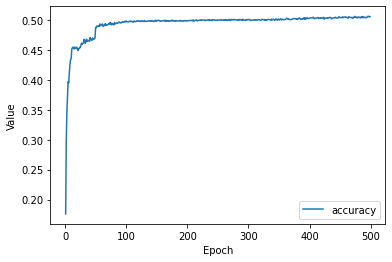

In [6]:
# The following variables are the hyperparameters.
learning_rate = 0.003
epochs = 500
batch_size = 5000
validation_split = 0.2

# Establish the model's topography.
my_model = create_model(learning_rate)

# Train the model on the normalized training set.
epochs, hist = train_model(my_model, x_train, y_train, 
                           epochs, batch_size, validation_split)

# Plot a graph of the metric vs. epochs.
list_of_metrics_to_plot = ['accuracy']
plot_curve(epochs, hist, list_of_metrics_to_plot)

# Evaluate against the test set.
print("\n Evaluate the new model against the test set:")
my_model.evaluate(x=x_test, y=y_test, batch_size=batch_size)

In [8]:
# make a prediction from the trained model
index=36
data = tf.constant(x_test.iloc[index].tolist(), shape=(1,28))
result = my_model.predict(data)
print(pd.DataFrame(result))
print(y_test.iloc[index])

     0    1    2    3    4    5    6    7    8    9   10
0 0.08 0.13 0.09 0.07 0.06 0.08 0.06 0.06 0.03 0.03 0.32
10
